## Temporal Data Types and Algorithms

In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa

### Time zone handling

In [2]:
ser = pd.Series([
    "2024-01-01 00:00:00",
    "2024-01-02 00:00:01",
    "2024-01-03 00:00:02"
], dtype="datetime64[ns]")
ser

0   2024-01-01 00:00:00
1   2024-01-02 00:00:01
2   2024-01-03 00:00:02
dtype: datetime64[ns]

In [3]:
ser.dt.tz is None

True

In [4]:
ny_ser = ser.dt.tz_localize("America/New_York")
ny_ser

0   2024-01-01 00:00:00-05:00
1   2024-01-02 00:00:01-05:00
2   2024-01-03 00:00:02-05:00
dtype: datetime64[ns, America/New_York]

In [5]:
ny_ser.dt.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### DateOffsets

In [6]:
ser = pd.Series([
    "2024-01-01",
    "2024-01-02",
    "2024-01-03",
], dtype="datetime64[ns]")
ser

0   2024-01-01
1   2024-01-02
2   2024-01-03
dtype: datetime64[ns]

In [7]:
ser + pd.DateOffset(months=1)

0   2024-02-01
1   2024-02-02
2   2024-02-03
dtype: datetime64[ns]

In [8]:
ser + pd.DateOffset(months=1, days=2, hours=3, minutes=4, seconds=5)

0   2024-02-03 03:04:05
1   2024-02-04 03:04:05
2   2024-02-05 03:04:05
dtype: datetime64[ns]

In [9]:
ser + pd.offsets.MonthEnd()

0   2024-01-31
1   2024-01-31
2   2024-01-31
dtype: datetime64[ns]

In [10]:
ser + pd.offsets.MonthBegin()

0   2024-02-01
1   2024-02-01
2   2024-02-01
dtype: datetime64[ns]

In [11]:
ser.dt.day_name()

0       Monday
1      Tuesday
2    Wednesday
dtype: object

In [12]:
ser + pd.offsets.CustomBusinessDay(
    n=3,
    weekmask="Mon Tue Wed Thu",
)

C:\Users\Kamran\AppData\Local\Temp\ipykernel_11828\83449446.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  ser + pd.offsets.CustomBusinessDay(


0   2024-01-04
1   2024-01-08
2   2024-01-09
dtype: datetime64[ns]

In [13]:
ser + pd.offsets.CustomBusinessDay(
    n=3,
    weekmask="Mon Tue Wed Thu",
    holidays=["2024-01-04"],
)

C:\Users\Kamran\AppData\Local\Temp\ipykernel_11828\2255203197.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  ser + pd.offsets.CustomBusinessDay(


0   2024-01-08
1   2024-01-09
2   2024-01-10
dtype: datetime64[ns]

### Datetime selection

In [14]:
pd.date_range(start="2023-12-27", freq="10D", periods=5)

DatetimeIndex(['2023-12-27', '2024-01-06', '2024-01-16', '2024-01-26',
               '2024-02-05'],
              dtype='datetime64[ns]', freq='10D')

In [15]:
pd.date_range(start="2023-12-27", freq="2W", periods=5)

DatetimeIndex(['2023-12-31', '2024-01-14', '2024-01-28', '2024-02-11',
               '2024-02-25'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [16]:
index = pd.date_range(start="2023-12-27", freq="10D", periods=20)
ser = pd.Series(range(20), index=index)
ser.loc[:pd.Timestamp("2024-01-18")]

2023-12-27    0
2024-01-06    1
2024-01-16    2
Freq: 10D, dtype: int64

In [17]:

ser.loc[pd.Timestamp("2024-01-06"):pd.Timestamp("2024-01-18")]

2024-01-06    1
2024-01-16    2
Freq: 10D, dtype: int64

In [18]:
index = pd.date_range(start="2023-12-27", freq="12h", periods=6, tz="US/Eastern")
ser = pd.Series(range(6), index=index)
ser

2023-12-27 00:00:00-05:00    0
2023-12-27 12:00:00-05:00    1
2023-12-28 00:00:00-05:00    2
2023-12-28 12:00:00-05:00    3
2023-12-29 00:00:00-05:00    4
2023-12-29 12:00:00-05:00    5
Freq: 12h, dtype: int64

### Resampling

In [19]:
index = pd.date_range(start="2024-01-01", periods=10, freq="s")
ser = pd.Series(range(10), index=index, dtype=pd.Int64Dtype())
ser

2024-01-01 00:00:00    0
2024-01-01 00:00:01    1
2024-01-01 00:00:02    2
2024-01-01 00:00:03    3
2024-01-01 00:00:04    4
2024-01-01 00:00:05    5
2024-01-01 00:00:06    6
2024-01-01 00:00:07    7
2024-01-01 00:00:08    8
2024-01-01 00:00:09    9
Freq: s, dtype: Int64

In [20]:
ser.resample("3s").sum()

2024-01-01 00:00:00     3
2024-01-01 00:00:03    12
2024-01-01 00:00:06    21
2024-01-01 00:00:09     9
Freq: 3s, dtype: Int64

In [21]:
ser.resample("3s", closed="right", label="right").sum()

2024-01-01 00:00:00     0
2024-01-01 00:00:03     6
2024-01-01 00:00:06    15
2024-01-01 00:00:09    24
Freq: 3s, dtype: Int64

In [22]:
index = pd.date_range(start="2024-01-01", freq="D", periods=10)
ser = pd.Series(range(10), index=index, dtype=pd.Int64Dtype())
ser

2024-01-01    0
2024-01-02    1
2024-01-03    2
2024-01-04    3
2024-01-05    4
2024-01-06    5
2024-01-07    6
2024-01-08    7
2024-01-09    8
2024-01-10    9
Freq: D, dtype: Int64

In [23]:
ser.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Aggregating weekly crime and traffic accidents

In [25]:
df = pd.read_parquet(
    "../data/crime.parquet",
).set_index("REPORTED_DATE")

df.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [26]:
df.resample("W").size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [27]:
len(df.sort_index().loc['2012-01-09':'2012-01-15'])

1071

<Axes: title={'center': 'All Denver Crimes'}, xlabel='REPORTED_DATE'>

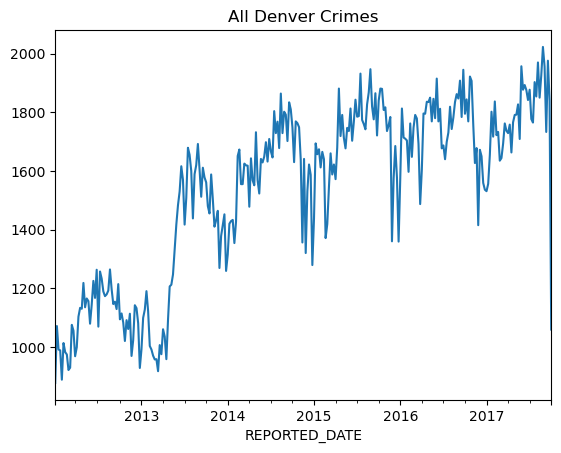

In [28]:
import matplotlib.pyplot as plt
plt.ion()
df.resample("W").size().plot(title="All Denver Crimes")

In [29]:
df.resample("QS")[["IS_CRIME", "IS_TRAFFIC"]].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


<Axes: title={'center': 'Denver Crime and Traffic Accidents'}, xlabel='REPORTED_DATE'>

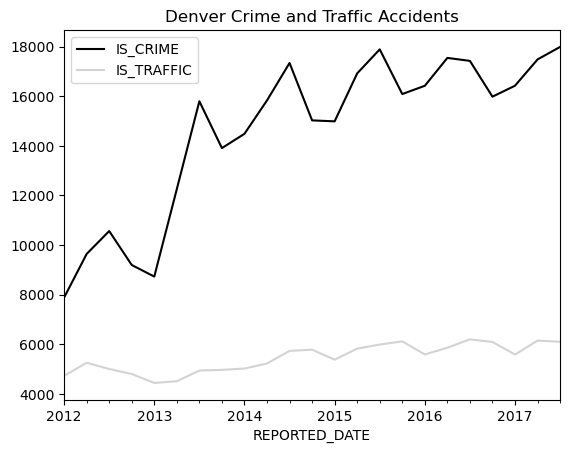

In [30]:
df.resample("QS")[["IS_CRIME", "IS_TRAFFIC"]].sum().plot(
  color=["black", "lightgrey"],
  title="Denver Crime and Traffic Accidents"
)

### Calculating year over year changes in crime by category

In [32]:
df = pd.read_parquet(
    "../data/crime.parquet",
)
df.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [33]:
df.groupby([
    "OFFENSE_CATEGORY_ID",
    pd.Grouper(key="REPORTED_DATE", freq="YS"),
], observed=True).agg(
    total_crime=pd.NamedAgg(column="IS_CRIME", aggfunc="sum"),
)

total_crime
OFFENSE_CATEGORY_ID REPORTED_DATE             
aggravated-assault  2012-01-01            1707
                    2013-01-01            1631
                    2014-01-01            1788
                    2015-01-01            2007
                    2016-01-01            2139
...                                        ...
white-collar-crime  2013-01-01             771
                    2014-01-01            1043
                    2015-01-01            1319
                    2016-01-01            1232
                    2017-01-01            1058

[90 rows x 1 columns]

In [34]:
df.groupby([
    "OFFENSE_CATEGORY_ID",
    pd.Grouper(key="REPORTED_DATE", freq="YS"),
], observed=True).agg(
    total_crime=pd.NamedAgg(column="IS_CRIME", aggfunc="sum"),
).assign(
    yoy_change=lambda x: x["total_crime"].pct_change().astype(pd.Float64Dtype())
).head(10)

total_crime  yoy_change
OFFENSE_CATEGORY_ID REPORTED_DATE                         
aggravated-assault  2012-01-01            1707        <NA>
                    2013-01-01            1631   -0.044523
                    2014-01-01            1788     0.09626
                    2015-01-01            2007    0.122483
                    2016-01-01            2139     0.06577
                    2017-01-01            1689   -0.210379
all-other-crimes    2012-01-01            1999    0.183541
                    2013-01-01            9377    3.690845
                    2014-01-01           15507    0.653727
                    2015-01-01           15729    0.014316

In [35]:
yoy_crime = df.groupby([
    "OFFENSE_CATEGORY_ID",
    pd.Grouper(key="REPORTED_DATE", freq="YS"),
], observed=True).agg(
    total_crime=pd.NamedAgg(column="IS_CRIME", aggfunc="sum"),
).assign(
    yoy_change=lambda x: x.groupby(
        level=0, observed=True
    ).pct_change().astype(pd.Float64Dtype())
)

yoy_crime.head(10)

total_crime  yoy_change
OFFENSE_CATEGORY_ID REPORTED_DATE                         
aggravated-assault  2012-01-01            1707        <NA>
                    2013-01-01            1631   -0.044523
                    2014-01-01            1788     0.09626
                    2015-01-01            2007    0.122483
                    2016-01-01            2139     0.06577
                    2017-01-01            1689   -0.210379
all-other-crimes    2012-01-01            1999        <NA>
                    2013-01-01            9377    3.690845
                    2014-01-01           15507    0.653727
                    2015-01-01           15729    0.014316

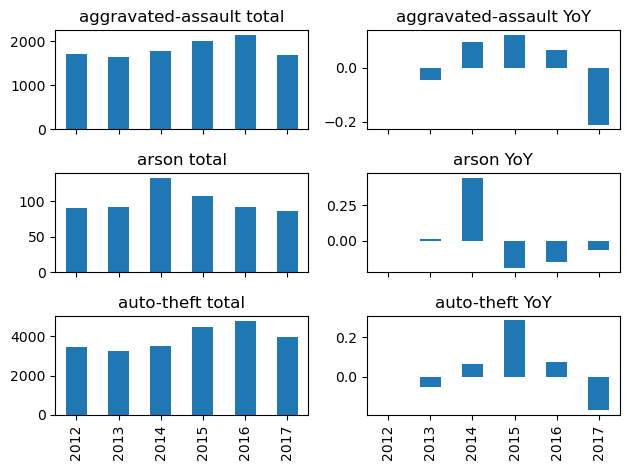

In [36]:
crimes = tuple(("aggravated-assault", "arson", "auto-theft"))
fig, axes = plt.subplots(nrows=len(crimes), ncols=2, sharex=True)

for idx, crime in enumerate(crimes):
    crime_df = yoy_crime.loc[crime]
    ax0 = axes[idx][0]
    ax1 = axes[idx][1]
    crime_df.plot(kind="bar", y="total_crime", ax=ax0, legend=False)
    crime_df.plot(kind="bar", y="yoy_change", ax=ax1, legend=False)

    xlabels = [x.year for x in crime_df.index]
    ax0.set_xticklabels(xlabels)
    ax0.set_title(f"{crime} total")
    ax1.set_xticklabels(xlabels)
    ax1.set_title(f"{crime} YoY")
    ax0.set_xlabel("")
    ax1.set_xlabel("")

plt.tight_layout()